In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian1DKernel, Gaussian2DKernel

import cv2

plt.style.use('ggplot')

##### 1. x[n] = {4, 16, 7, 11, 4, 13, 1/2, 2/3, -1/2, 15} and h[n] = {1/2, 0, -1/2}. 

(a) Show your calculations for convolution x[n] ∗ h[n], convolution x[n] ∗ h[−n] and
cross-correlation x[n] ⊗ h[n]

Ans: x[n] ∗ h[n]:

First pad the signal with zeros: x'[n] = {0, 4, 16, 7, 11, 4, 13, 1/2, 2/3, -1/2, 15, 0}

g[0] = $\begin{bmatrix} 0 & 4 & 16 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = 8.0$

g[1] = $\begin{bmatrix} 4 & 16 & 7 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = 1.5$

g[2] = $\begin{bmatrix} 16 & 7 & 11 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = -2.5$

g[3] = $\begin{bmatrix} 7 & 11 & 4 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = -1.5$

g[4] = $\begin{bmatrix} 11 & 4 & 13 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = 1.0$

g[5] = $\begin{bmatrix} 4 & 13 & 1/2 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = -1.75$

g[6] = $\begin{bmatrix} 13 & 1/2 & 2/3 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = -6.17$

g[7] = $\begin{bmatrix} 1/2 & 2/3 & -1/2 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = -0.5$

g[8] = $\begin{bmatrix} 2/3 & -1/2 & 15 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = 7.17$

g[9] = $\begin{bmatrix} -1/2 & 15 & 0 \end{bmatrix} . \begin{bmatrix} -1/2 \\ 0 \\ 1/2 \end{bmatrix} = 0.25$


x[n] ∗ h[-n]:

g[0] = $\begin{bmatrix} 0 & 4 & 16 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -8.0$

g[1] = $\begin{bmatrix} 4 & 16 & 7 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -1.5$

g[2] = $\begin{bmatrix} 16 & 7 & 11 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 2.5$

g[3] = $\begin{bmatrix} 7 & 11 & 4 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 1.5$

g[4] = $\begin{bmatrix} 11 & 4 & 13 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -1.0$

g[5] = $\begin{bmatrix} 4 & 13 & 1/2 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 1.75$

g[6] = $\begin{bmatrix} 13 & 1/2 & 2/3 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 6.17$

g[7] = $\begin{bmatrix} 1/2 & 2/3 & -1/2 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 0.5$

g[8] = $\begin{bmatrix} 2/3 & -1/2 & 15 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -7.17$

g[9] = $\begin{bmatrix} -1/2 & 15 & 0 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -0.25$


x[n] ⊗ h[n]:

g[0] = $\begin{bmatrix} 0 & 4 & 16 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -8.0$

g[1] = $\begin{bmatrix} 4 & 16 & 7 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -1.5$

g[2] = $\begin{bmatrix} 16 & 7 & 11 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 2.5$

g[3] = $\begin{bmatrix} 7 & 11 & 4 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 1.5$

g[4] = $\begin{bmatrix} 11 & 4 & 13 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -1.0$

g[5] = $\begin{bmatrix} 4 & 13 & 1/2 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 1.75$

g[6] = $\begin{bmatrix} 13 & 1/2 & 2/3 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 6.17$

g[7] = $\begin{bmatrix} 1/2 & 2/3 & -1/2 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = 0.5$

g[8] = $\begin{bmatrix} 2/3 & -1/2 & 15 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -7.17$

g[9] = $\begin{bmatrix} -1/2 & 15 & 0 \end{bmatrix} . \begin{bmatrix} 1/2 \\ 0 \\ -1/2 \end{bmatrix} = -0.25$

(b) From the previous question, what relationship do you observe among the two
convolutions and the cross-correlation calculations?

Ans:

1. x[n] ∗ h[−n] = x[n] ⊗ h[n]
2. Cross correlation is a reflection of the convolved signal.

(c) What is the location with the maximum cross-correlation? What does this represent?

Ans: The location of maximum correlation is f[7] = 1/2. This represent the location maximally correlated with h[n].

(d) Write two Python programs convolution 1d.py and cross corr 1d.py and confirm
your calculations above.

In [22]:
fn = [4, 16, 7, 11, 4, 13, 0.5, 2/3, -0.5, 15]
hn = [0.5, 0, -0.5]

def convolution_1d(x, h, r=1):
    
    k = len(h) // 2
    h = np.flip(h)
    
    pad = k + r
    xp = np.pad(x, pad, 'constant')
    fg = []
    for i in range(pad, len(x) + pad, r):
        fk = xp[i - k : i + k + 1]
        g = np.dot(fk, h)
        print('{} . {} = {}'.format(fk, h, g))
        fg.append(g)
    return fg

def cross_corr_1d(x, h):
    
    h = np.flip(h)
    
    return convolution_1d(x, h)

In [27]:
print('---------------x[n] ∗ h[n]---------------')
g1 = convolution_1d(fn, hn)
print('---------------x[n] ∗ h[-n]---------------')
g2 = convolution_1d(fn, np.flip(hn))
print('---------------x[n] ⊗ h[n]---------------')
g3 = cross_corr_1d(fn, hn)

---------------x[n] ∗ h[n]---------------
[ 0.  4. 16.] . [-0.5  0.   0.5] = 8.0
[ 4. 16.  7.] . [-0.5  0.   0.5] = 1.5
[16.  7. 11.] . [-0.5  0.   0.5] = -2.5
[ 7. 11.  4.] . [-0.5  0.   0.5] = -1.5
[11.  4. 13.] . [-0.5  0.   0.5] = 1.0
[ 4.  13.   0.5] . [-0.5  0.   0.5] = -1.75
[13.          0.5         0.66666667] . [-0.5  0.   0.5] = -6.166666666666667
[ 0.5         0.66666667 -0.5       ] . [-0.5  0.   0.5] = -0.5
[ 0.66666667 -0.5        15.        ] . [-0.5  0.   0.5] = 7.166666666666667
[-0.5 15.   0. ] . [-0.5  0.   0.5] = 0.25
---------------x[n] ∗ h[-n]---------------
[ 0.  4. 16.] . [ 0.5  0.  -0.5] = -8.0
[ 4. 16.  7.] . [ 0.5  0.  -0.5] = -1.5
[16.  7. 11.] . [ 0.5  0.  -0.5] = 2.5
[ 7. 11.  4.] . [ 0.5  0.  -0.5] = 1.5
[11.  4. 13.] . [ 0.5  0.  -0.5] = -1.0
[ 4.  13.   0.5] . [ 0.5  0.  -0.5] = 1.75
[13.          0.5         0.66666667] . [ 0.5  0.  -0.5] = 6.166666666666667
[ 0.5         0.66666667 -0.5       ] . [ 0.5  0.  -0.5] = 0.5
[ 0.66666667 -0.5        15.   

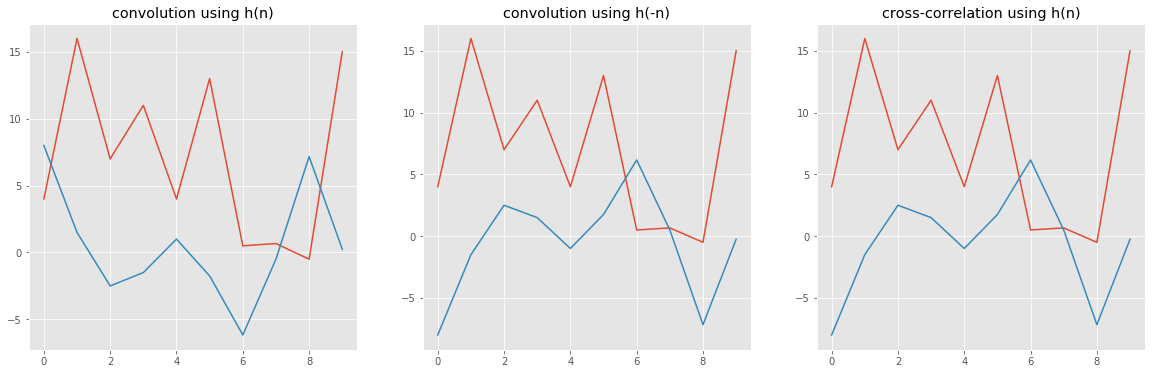

In [3]:
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.title('convolution using h(n)')
plt.plot(fn)
plt.plot(convolution_1d(fn, hn))

plt.subplot(132)
plt.title('convolution using h(-n)')
plt.plot(fn)
plt.plot(convolution_1d(fn, np.flip(hn)))


plt.subplot(133)
plt.title('cross-correlation using h(n)')
plt.plot(fn)
plt.plot(cross_corr_1d(fn, hn))

plt.show()

##### 2. For this problem, generate a 1D signal x[n] from a 4th order polynomial x(t) = t(t − 10)(t − 20)(t − 30), t ∈ [0, 30]. Keep your sampling frequency (or sampling interval) as a variable quantity to help you experiment.

(a) Following “Sec. 3.5.2 Decimation” in the text book, write a Python program
decimate 1d.py to decimate any arbitrary 1D signals x[n] at a downsampling rate of r
(integer). For filtering, you may use any of the filters given in Table 3.2 for 2×
decimation.

In [4]:
def gen_sample(t):
    
    return t*(t-10)*(t-20)*(t-30)

def decimate_1d(x, r=2, k_size=3, f=True):
    fg = []
    if f:
        h = Gaussian1DKernel(2, x_size=k_size).array        
    else:
        h = np.zeros((k_size,))
        h[k_size // 2] = 1
    return convolution_1d(x, h, r=r)

i. Demonstrate your program using the above fourth order polynomial signal
decimated at the rate r = 2.

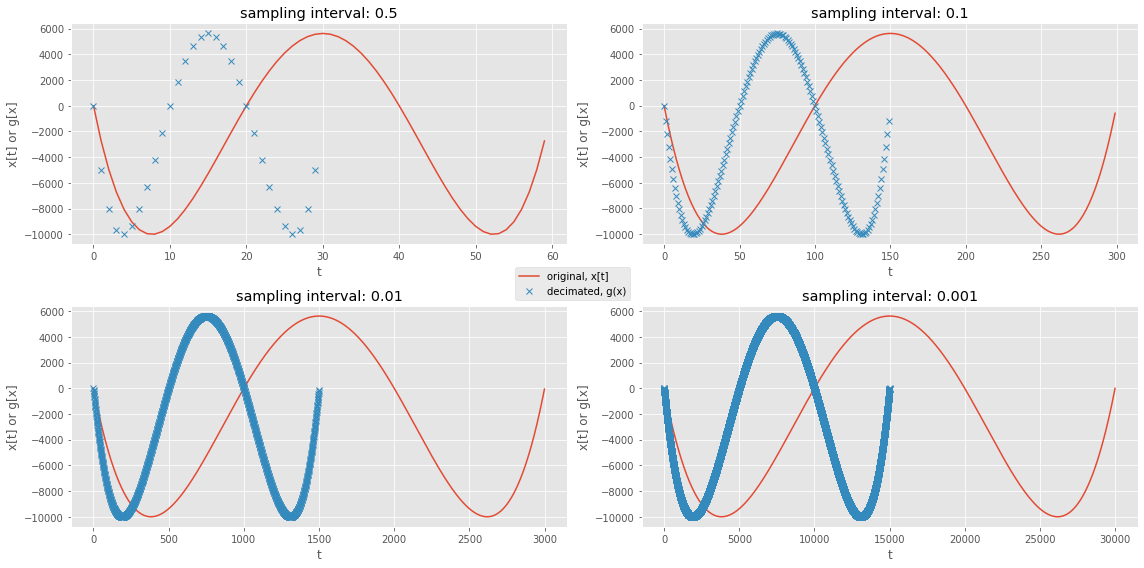

In [5]:
t_r = [0.5, 0.1, 0.01, 0.001]
X = []
Xd = []
for r in t_r:
    
    t = np.arange(0,30,r)
    x = gen_sample(t)
    
    X.append(x)

    xd = decimate_1d(x, 2, k_size=5, f=False)
    
    Xd.append(xd)

fig, axes = plt.subplots(2,2, figsize=(16,8))

for i,ax in enumerate(axes.flatten()):
    ax.set_title('sampling interval: {}'.format(t_r[i]))
    l1 = ax.plot(X[i])[0]
    l2 = ax.plot(Xd[i], 'x')[0]
    ax.set_xlabel('t')
    ax.set_ylabel('x[t] or g[x]')
    
fig.legend(handles=[l1, l2], labels=['original, x[t]', 'decimated, g(x)'], loc='center')
fig.tight_layout()

ii. Plot the original signal x[n], downsampled signal without filtering and decimated
signal (with filtering).

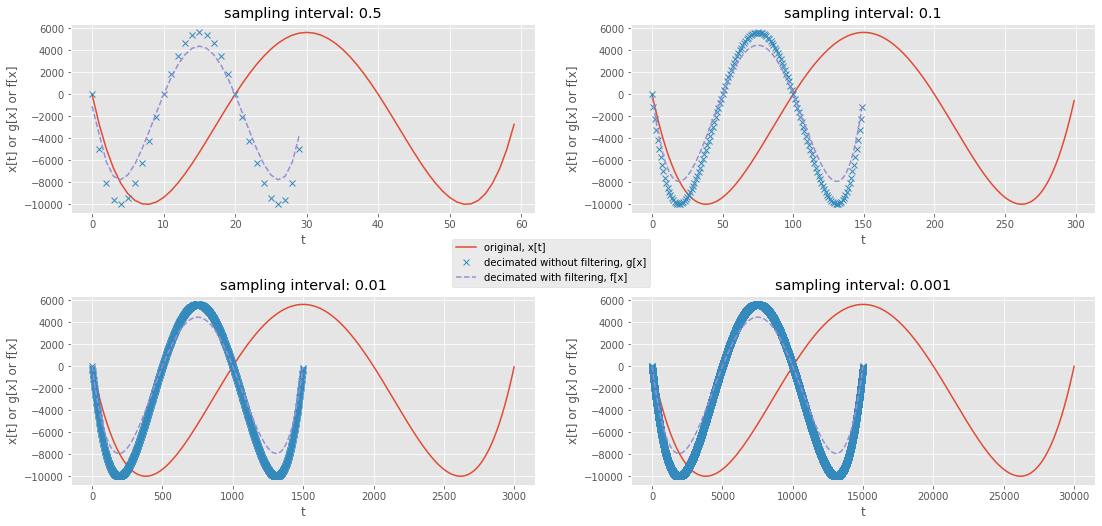

In [6]:
Xf = []
for x in X:
    xf = decimate_1d(x, 2, k_size=5, f=True)
    
    Xf.append(xf)
fig, axes = plt.subplots(2,2, figsize=(16,8))

for i,ax in enumerate(axes.flatten()):
    ax.set_title('sampling interval: {}'.format(t_r[i]))
    l1 = ax.plot(X[i])[0]
    l2 = ax.plot(Xd[i], 'x')[0]
    l3 = ax.plot(Xf[i], '--')[0]
    ax.set_xlabel('t')
    ax.set_ylabel('x[t] or g[x] or f[x]')
    
fig.legend(handles=[l1, l2, l3], labels=['original, x[t]', 'decimated without filtering, g[x]',
                                        'decimated with filtering, f[x]'], loc='center')
fig.tight_layout(pad=3.2)

iii. Plot the frequency spectrum of the original signal, downsampled signal without
filtering and decimated signal (i.e. filtered and downsampled signal).

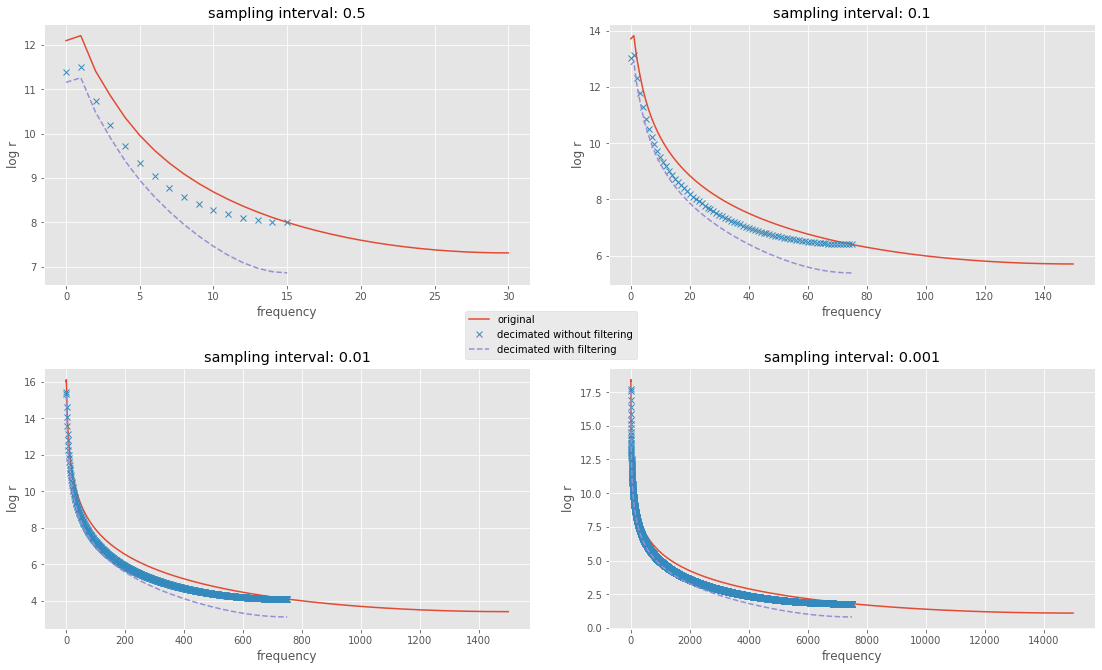

In [7]:
R =[]
Rd = []
Rf = []
for i in range(4):
    x = X[i]
    xd = Xd[i]
    xf = Xf[i]
    
    r = np.absolute(np.fft.rfft(x))
    rd = np.absolute(np.fft.rfft(xd))
    rf = np.absolute(np.fft.rfft(xf))
    
    R.append(np.log(r))
    Rd.append(np.log(rd))
    Rf.append(np.log(rf))
    
fig, axes = plt.subplots(2,2, figsize=(16,10))

for i,ax in enumerate(axes.flatten()):
    ax.set_title('sampling interval: {}'.format(t_r[i]))
    l1 = ax.plot(R[i])[0]
    l2 = ax.plot(Rd[i], 'x')[0]
    l3 = ax.plot(Rf[i], '--')[0]
    ax.set_xlabel('frequency')
    ax.set_ylabel('log r')
    
fig.legend(handles=[l1, l2, l3], labels=['original', 'decimated without filtering',
                                        'decimated with filtering'], loc='center')
fig.tight_layout(pad=3.2)

iv. Write your observations about the original signal, downsampled signal, decimated
signal and their frequency characteristics. Is there any benefit in filtering the
signal before downsampling ?

Ans: Decimating the signal without filtering causes it to retain its peak values whereas filtering causes the convolved signal to retain overall structure of the signal. Also, it is clear from figure-2(iii) that the original signal contains more frequency spectrums compared to the decimated signal. The decimated filtered signal penalizes high frequency as it should, this could help to reduce noise in a signal and retain the overall structure of signal during downsampling.

(b) Following “Sec. 3.5.1 Interpolation” in the text book, write a Python program
interpolate 1d.py to upsample any arbitrary signal x[n] at an upsampling rate r.
Demonstrate your program using the above fourth order polynomial signal upsampled
at the rate r = 2. For filtering, you may use any of the smoothing kernels given in
Table 3.1 for 2× upsampling.

In [8]:
def interpolate_1d(x, r=2, k_size=3, f=True):
    xp = np.zeros((len(x) * 2,))
    for i in range(1, len(x) + 1):
        xp[r * (i-1)] = x[i-1]
        
    if f:
        h = Gaussian1DKernel(1, x_size=k_size).array
    else:
        h = np.zeros((k_size,))
        h[k_size // 2] = 1
    return convolution_1d(xp, h, 1)

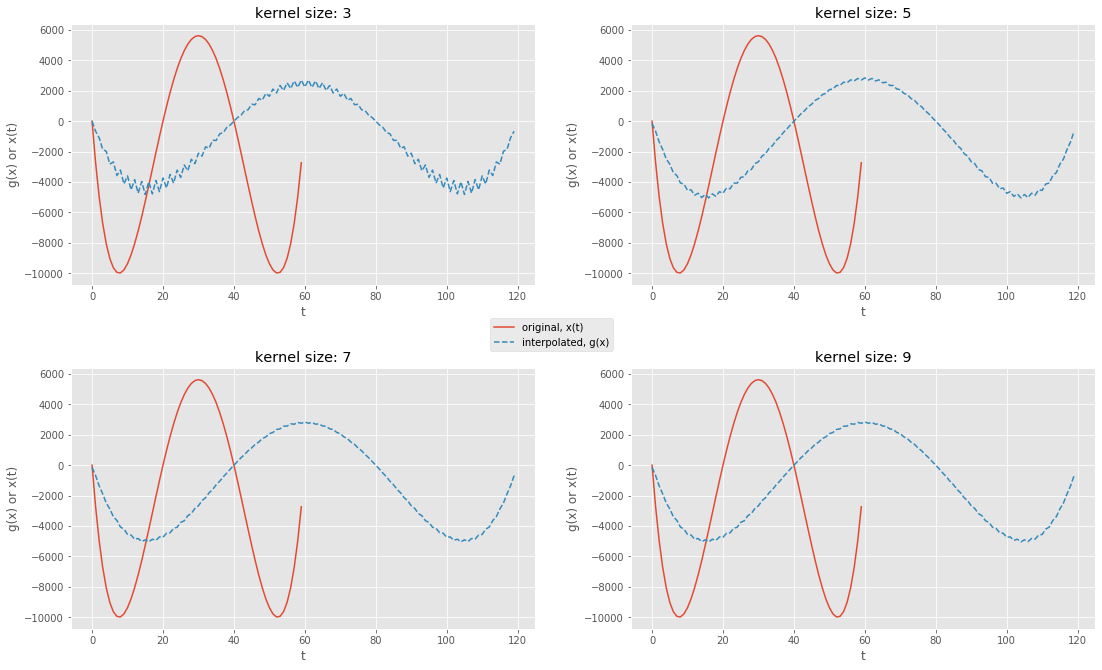

In [9]:
K = [3,5,7,9]
x = X[0]
Xi = []
for k in K:
    xf = interpolate_1d(x, k_size=k)
    Xi.append(xf)
        
fig, axes = plt.subplots(2,2, figsize=(16,10))

for i,ax in enumerate(axes.flatten()):
    ax.set_title('kernel size: {}'.format(K[i]))
    l1 = ax.plot(x)[0]
    l2 = ax.plot(Xi[i], '--')[0]
    ax.set_xlabel('t')
    ax.set_ylabel('g(x) or x(t)')
    
fig.legend(handles=[l1, l2], labels=['original, x(t)', 'interpolated, g(x)'], loc='center')
fig.tight_layout(pad=3.2)

##### 3. Use the attached image cameraman.tif for evaluating your programs for the following problems.

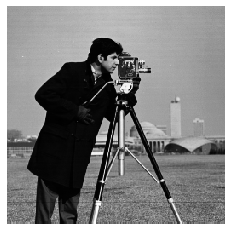

In [10]:
img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

(a) Extend your Python program convolution 1d.py for 2D convolutions as
convolution 2d.py.

In [12]:
def convolution_2d(img, f, stride=[1,1]):
    x,y = img.shape
    f = np.flip(f)
    m,n = f.shape
    
    s_x, s_y = stride
    k_x, k_y = m//2, n//2
    pad_x, pad_y = k_x + s_x - 1, k_y + s_y  - 1
    
    img = np.pad(img, [pad_x,pad_y], 'constant')
    
    conv_img = np.empty((x//s_x, y//s_y))
    
    for i,p in zip(range(pad_x, x + pad_x, s_x), range(conv_img.shape[0])):
        for j,q in zip(range(pad_y, y + pad_y, s_y), range(conv_img.shape[1])):
            w = img[i - k_x:i + k_x + 1, j - k_y:j + k_y + 1]
            conv_img[p,q] = np.dot(w.flatten(), f.flatten())

    return conv_img

(b) Using your convolution 2d.py program, estimate derivatives of the test image along
arbitrary directions using a Gaussian derivative filter (refer to “Sec. 3.2.3 Band-pass
and steerable filters” in the textbook)

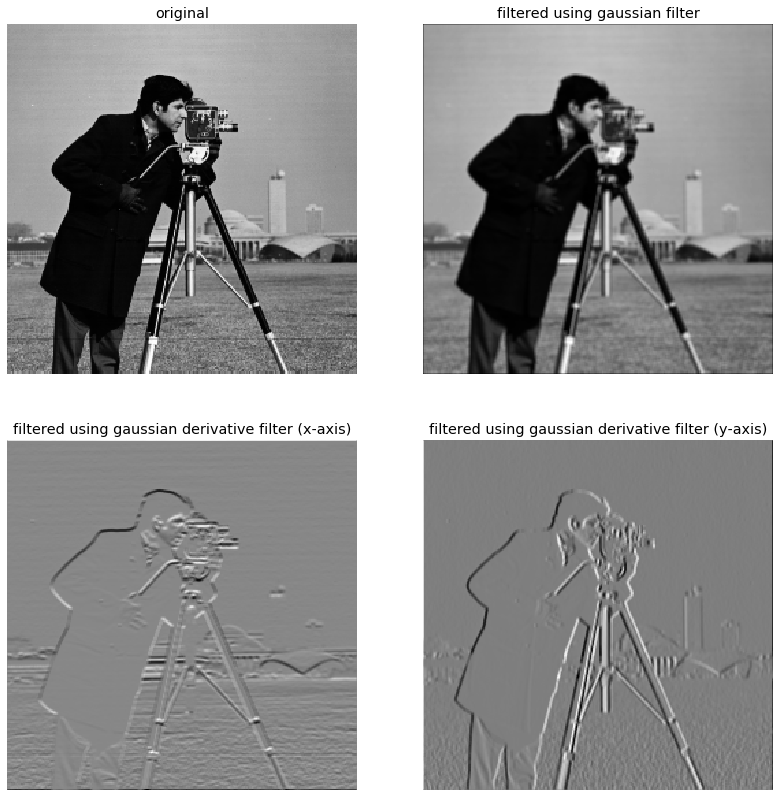

In [30]:
h0 = Gaussian2DKernel(5, 5, x_size=3, y_size=3, theta=np.radians(90)).array
hx = np.gradient(h0, axis=0)
hy = np.gradient(h0, axis=1)

H = [h0, hx, hy]

conv = [img]

for h in H:
    c = convolution_2d(img, h, (1,1))
    conv.append(c)

title = ['original', 'filtered using gaussian filter', 
         'filtered using gaussian derivative filter (x-axis)',
        'filtered using gaussian derivative filter (y-axis)']

fig, axes = plt.subplots(2,2, figsize=(12,12))

for i, ax in enumerate(axes.flatten()):
    ax.set_title(title[i])
    ax.imshow(conv[i], cmap='gray')
    ax.axis('off')
    
fig.tight_layout(pad=3.2)

90.2